# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

Z miasta A do miasta B kierowca przejechał ze średnią szybkością 60 km/h. Z powrotem jechał szybciej, ze średnią 80 km/h. Jaka była jego średnia szybkość na całej trasie? 

**Uwaga:** nie używaj gotowych implementacji.

> Wskazówka: średnia harmoniczna.

In [10]:
# << UZUPEŁNIJ >>
import random
import time


def harmonic_mean(values: list):
    n = len(values)
    sum_of_inverses = 0
    for v in values:
        sum_of_inverses += 1/v

    return n / sum_of_inverses

print(harmonic_mean([60, 80]))

68.57142857142857


### Zadanie 2

Wyobraźmy sobie miasto o liczbie 700 tys. mieszkańców. W mieście pojawiła się choroba i wiemy, że jedna osoba na 1000 zachorowała. Nie wiemy, które to dokładnie osoby, ale jest dostępny test, którego skuteczność wynosi 99%. Teraz wcielamy się w pacjenta, który przeprowadził test, a wynik testu jest pozytywny. Chcemy dowiedzieć się, jakie jest prawdopodobieństwo, że zachorowaliśmy.

#### A)

Przeprowadzić symulację komputerową:

- Generujemy listę wielkości 700 tys.
- Losowo wybieramy 700 tys./1000 (bo jedna na 1000 osob zachorowała) osób i zaznaczamy je jako chore.
- Wybieramy losowo po 1% osob chorych i zdrowych, a następnie zaznaczamy ich diagnoze na nieprawidlowa (bo skutecznosc testu wynosi 99%).
- Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora (`liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`).



In [11]:
# << UZUPEŁNIJ >>
import numpy as np
import random
import time

# 0 - zdrowy,
# 1 - chory,
# 2 - zdrowy zly wynik
# 3 - chory zly wynik,

czasek = time.perf_counter()

citizens = [0 for i in range(700_000)]

number_of_sick = round(len(citizens) / 1000)


for i in range(0, number_of_sick):
    citizens[i] = 1

false_positive = 0.01 * citizens.count(0)
false_negative = 0.01 * citizens.count(1)

print(citizens[number_of_sick])

for i in range(number_of_sick, int(false_positive) + number_of_sick):
    citizens[i] = 2

for i in range(0, int(false_negative)):
    citizens[i] = 3

print((citizens.count(1)) / (citizens.count(1) + citizens.count(2)))

print('Czas:', time.perf_counter() - czasek)

0
0.09016393442622951
Czas: 0.06697549999999808


#### B)

Napisać funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Zmierz i porównaj czas obliczeń w zad. A i zad. B



In [12]:
# << UZUPEŁNIJ >>

def bayes(sick_percentage, healthy_percentage, effectivness_sick, effectivenss_healthy):
    PD = sick_percentage
    PN = healthy_percentage
    P_p_D = effectivness_sick
    P_m_N = effectivenss_healthy
    P_p_N = 1-P_m_N

    return (P_p_D * PD) / ((P_p_D * PD) + (P_p_N * PN))

czasek = time.perf_counter()
print(bayes(0.001, 0.999, 0.99, 0.99))
print('Czas:', time.perf_counter() - czasek)

0.09016393442622944
Czas: 0.0005678000000131078


#### C)

Wyświetl wykres, gdzie na osi X znajduje się _czułość testu_ a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_.

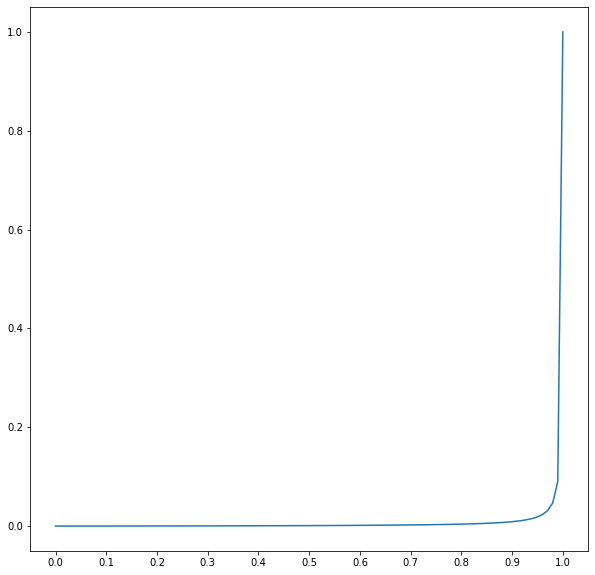

In [13]:
# << UZUPEŁNIJ >>

import matplotlib.pyplot as plt
x = [z/100 for z in range(0, 101)]
y = [bayes(0.001, 0.999, z, z) for z in x]

plt.figure(figsize=(10, 10))
# plt.yscale('log')
plt.xticks([z/10 for z in range(0, 11)])
plt.plot(x, y)

### Zadanie 3

Sprawdź (symulacją) jak często trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze z 13 kart. Czyli losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w jakimś kolorze dostaniemy $\ge 8$ kart. Przeprowadź 1000 takich prob i oblicz średnią. Dodatkowo wypisz jedną (np. ostatnią) taką wylosowaną rękę.

In [14]:
# << UZUPEŁNIJ >>
from collections import Counter

kolory = ['pik', 'kier', 'trefl', 'karo']

figury = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'walet', 'dama', 'krol', 'as']

talia = []

for k in kolory:
    for f in figury:
        talia.append((k, f))

random.shuffle(talia)

reka = [talia[i] for i in range(13)]
srednie = []

for i in range(1000):
    flag = True
    counter = 0
    while flag:
        counter += 1
        random.shuffle(talia)
        reka = [talia[i] for i in range(13)]
        vals = tuple(Counter(x[0] for x in reka).values())
        for v in vals:
            if v >= 8:
                flag = False
                break
    srednie.append(counter)
    pass

print('Ostatnia wylosowana reka: ', reka)
print('Srednia ilosc losowan do uzyskania warunku: ', (sum(srednie) / len(srednie)))

Ostatnia wylosowana reka:  [('trefl', '8'), ('karo', '10'), ('pik', 'krol'), ('pik', 'dama'), ('pik', '5'), ('kier', '6'), ('pik', '8'), ('pik', '4'), ('trefl', 'as'), ('pik', '9'), ('kier', '7'), ('pik', 'as'), ('pik', '3')]
Srednia ilosc losowan do uzyskania warunku:  204.488
